## Required

Main objective of the analysis that specifies whether your model will be focused on: prediction  
 

Brief description of the data set you chose and a summary of its attributes. 
- The data set is on cars; prices, make model, year, mpg, popularity, msrp, etc.

Brief summary of data exploration actions taken for data cleaning actions taken for feature engineering. 
- For the data exploration i looked at the distribution of the target variable, the features, distribution of values in these features, quality of data, and the number of missing values. 
- Data cleaning replaced spaces with underscores and all string columns were lowercase. 
- Feature engineering: subtracted current year from year of car to get the cars age

Summary of training at least three linear regression models which should be variations that cover using:
- a simple linear regression as a baseline, 
    - Created an array that only contains ones, then added the array of ls as the first column of X. I computed X^TX and its inverse. Computed the rest of the normal equation and split the weights vector into bias and the rest of the weights. 

- adding polynomial effects, 
- and using a regularization regression. 
    - I controlled the amount of regularization by using the parameter r and added r to the main diagonal of XTX. Resulted in making the components of w smaller in the final solution. 


A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability. 


Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model. 

Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


In [1]:
import numpy as np 
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
len(df)

11914

The function prints 11914, which means that there are almost 12,000 cars in this dataset

### Brief description of the data set you chose and a summary of its attributes. 


In [47]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


The function prints 11914, which means that there are almost 12,000 cars in this dataset

In [5]:
# Lowercases all the columns names, and replaces spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Selects only columns with string values
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

# Lowercases and replaces spaces with underscores for values in all string columns of the DataFrame
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


The result of preprocessing the data. The column names and values are normalized:
they are lowercase, and the spaces are converted to underscores.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

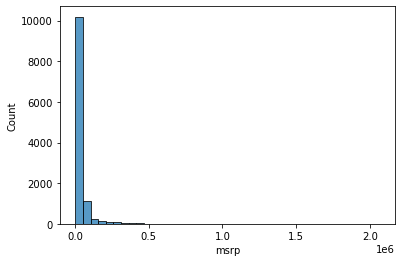

In [7]:
sns.histplot(df.msrp, bins=40)

The distribution of the prices in the dataset. We see many values at the low end
of the price axis and almost nothing at the high end. This is a long tail distribution, which is
a typical situation for many items with low prices and very few expensive ones.

<AxesSubplot:xlabel='msrp', ylabel='Count'>

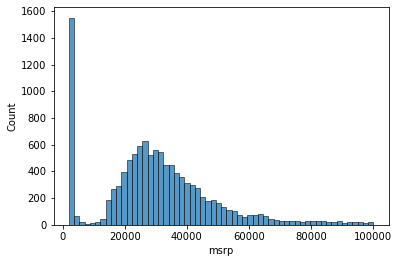

In [8]:
sns.histplot(df.msrp[df.msrp < 100000])

The distribution of the prices for cars below $100,000. Looking only at car
prices below $100,000 allows us to see the head of the distribution better. We also notice
a lot of cars that cost $1,000.

In [9]:
log_price = np.log1p(df.msrp)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

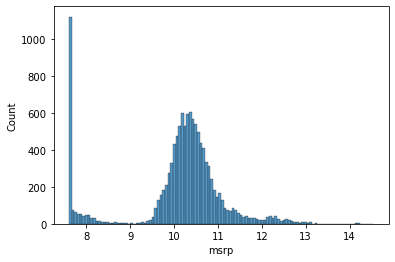

In [10]:
sns.histplot(log_price)

The logarithm of the price. The effect of the long tail is removed, and we
can see the entire distribution in one plot.

In [11]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

We need to deal with missing values later when we train the model, so we should
keep this problem in mind. For now, we don’t do anything else with these features and
proceed to the next step: setting up the validation framework so that we can train and
test machine learning models.

The entire dataset is split into three parts: train, validation and test.
* 20% of data goes to validation
* 20% goest to test
* remaining 60% goes to train.

In [12]:
# get the number of rows in the dataframe
n = len(df)

# calculate how many rows should go to train, validation , and test
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

# Fixes the random seed to make sure that the results are reproducible
# Create a numpy array with indicies from 0 to (n-1), and shuffles it
np.random.seed(2)
idx = np.arange(n)
np.random.shuffle(idx)

# use the array with indicies to get a shuffled DataFrame
df_shuffled = df.iloc[idx]

# Split the shuffled DataFrame into train, validation, and test
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

Now the DataFrame is split into three parts, and we can continue. Our initial analysis
showed a long tail in the distribution of prices, and to remove its effect, we need to
apply the log transformation. We can do that for each DataFrame separately:

In [13]:
y_train_orig = df_train.msrp.values
y_val_orig = df_val.msrp.values
y_test_orig = df_test.msrp.values

y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

To avoid accidentally using the target variable later, let’s remove it from the dataframes:

## When the validation split is done, we can go to the next step: training a model.

After performing the initial data analysis, we are ready to train a model. The problem
we are solving is a regression problem: the goal is to predict a number — the price of
a car.

a supervised machine learning model has the form

y = g(X)

This is a matrix form. X is a matrix where the features of observations are rows of the
matrix, and y is a vector with the values we want to predict.

### Exercise 2.2

For supervised learning, we use a machine learning model for a single observation yi ≈ g(xi). What are xi and yi for this project?

* xi is a feature vector — a vector that contains a few numbers that describe the object (a car) — and yi is the logarithm of the price of this car.
* yi is a feature vector — a vector that contains a few numbers that describe the object (a car) — and xi is the logarithm of the price of this car.

### Exercise 2.3
When we multiply the matrix X by the weights vector w, we get
* a A vector y with the actual price
* b A vector y with price predictions
* c A single number y with price predictions

## Linear Regression

#### To implement the normal equation, we need to do the following:
* 1 Create a function that takes in a matrix X with features and a vector y with the target.
* 2 Add a dummy column (the feature that is always set to 1) to the matrix X.
* 3 Train the model: compute the weights w by using the normal equation.
* 4 Split this w into the bias w0 and the rest of the weights, and return them.

In [14]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

## Baseline Solution

In [15]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

save the above featues to a variable df_numn

In [16]:
df_num = df_train[base]


replace missinging values with 0's, with fillno(0)

In [17]:
df_num = df_num.fillna(0)

covert dataframe to a numpy array using the values property

In [18]:
X_train = df_num.values

## below we will train our first model! 
#### X_train is a two-dimensional NumPy array. It’s something we can use as input to our linear_regresson function. 

In [19]:
w_0, w = train_linear_regression(X_train, y_train)

#### Now we can apply it to the training data to see how well it predicts:

In [20]:
y_pred = w_0 + X_train.dot(w)

#### next we'll plot the predicted values and compare them with the actual prices:

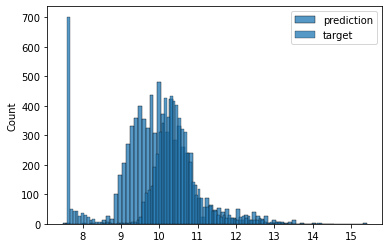

In [21]:
sns.histplot(y_pred, label='prediction')
sns.histplot(y_train, label='target')
plt.legend()

#### The distribution of the predicted values (light gray) and the actual values (dark gray). We see that our predictions aren’t very good; they are very different from the actual distribution.

#### We can see from the plot (figure 2.14) that the distribution of values we predicted looks quite different from the actual values. This result may indicate that the model is not powerful enough to capture the distribution of the target variable. This shouldn’t be a surprise to us: the model we used is quite basic and includes only five very simple features.

## RMSE: Evaluating model quality
#### Root mean squared error

#### When using NumPy to implement RMSE, we can take advantage of vectorization: the process of applying the same operation to all elements of one or more NumPy arrays.

In [22]:
def rmse(y, y_pred):
    # compute the difference b/w the prediction and the 
    error = y_pred - y
    
    # Compute MSE: first computes the squared error, and then calculates its mean
    mse = (error ** 2).mean()
    
    # take the square root to get RMSE
    return np.sqrt(mse)

We can use RMSE to evaluate the quality of the model:

In [23]:
rmse(y_train, y_pred)

0.7554192603920132

#### This number tells us that on average, the model’s predictions are off by 0.75. This result alone may not be very useful, but we can use it to compare this model with other models. If one model has a better (lower) RMSE than the other, it indicates that model is better.

## Validating the model

#### We have already split our data into multiple parts: df_train, df_val, and df_test. We have also created a matrix X_train from df_train and used X_train and y_train to train the model. Now we need to do the same steps to get X_val — a matrix with features computed from the validation dataset. Then we can apply the model to X_val to get predictions and compare them with y_val.

First, we create the X_val matrix, following the same steps as for X_train:

In [24]:
df_num = df_val[base]
df_num = df_num.fillna(0)
X_val = df_num.values

#### We’re ready to apply the model to X_val to get predictions:

In [25]:
y_pred = w_0 + X_val.dot(w)

#### The y_pred array contains the predictions for the validation dataset. Now we use y_pred and compare it with the actual prices from y_val, using the RMSE function that we implemented previously:

In [26]:
rmse(y_val, y_pred)

0.761653099130156

In the previous code we already see some duplication: training and validation tests require the same preprocessing, and we wrote the same code twice. Thus, it makes sense to move this logic to a separate function and avoid duplicating the code.

#### We can call this function prepare_X because it creates a matrix X from a Data-Frame.

In [27]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#### Now the whole training and evaluation becomes simpler and looks like this:

In [28]:
# Train the model
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

# Apply the model to the validation dataset
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)

# compute rmse on the validation data
print('validaiton:', rmse(y_val, y_pred))

validaiton: 0.761653099130156


#### This gives us a way to check whether any model adjustments lead to improvements in the predictive quality of the model.

## Simple feature engineering

we can calculate the age by subtracting the year when the car
was made from 2017:

In [29]:
df_train['age'] = 2017 - df_train.year

In [30]:
# Create a copy of the input parameter to prevent side effects
def prepare_X(df):
    df = df.copy()
    # createa a copy of the base list with the basic features
    features = base.copy()
    
    # Compute the age feature
    df['age'] = 2017 - df.year
    # Appen age to the list of feature names we use for the model
    features.append('age')
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#### test if adding the feature “age” leads to any improvements:

In [31]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation', rmse(y_val, y_pred))

train 0.5175055465840046
validation 0.5172055461058299


#### The validation error is 0.517, which is a good improvement from 0.76 — the value we had in the baseline solution. Thus, we conclude that adding “age” is indeed helpful when making predictions.


We can also look at the distribution of the predicted values:

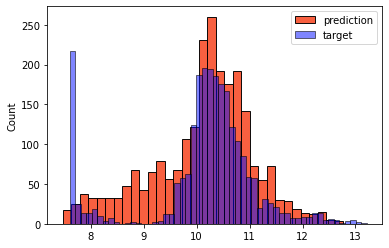

In [32]:
sns.histplot(y_pred, label='prediction', color='#f62b00')
sns.histplot(y_val, label='target', color='#000dff', alpha=0.5)
plt.legend()

## Handling categorical variables

In [33]:
df['make'].value_counts().head(5)

chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: make, dtype: int64

In [34]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

In our case, we will create three binary features: num_doors_2, num_doors_3, and num_doors_4. If the car has two doors, num_doors_2 will be set to 1, and the rest will be 0. If the car has three doors, num_doors_3 will get the value 1, and the same goes for
num_doors_4. This method of encoding categorical variables is called one-hot encoding.

In [35]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')

    # Iterate over possible values of the 'number of doors' variable
    for v in [2, 3, 4]:
        # Give a feature a meaningful name, such as 'num_doors_2' for v=2
        feature = 'num_doors_%s' % v
        # Create the one-hot-encoding feature
        value = (df['number_of_doors'] == v).astype(int)
        # Add feature back to the dataframe, using the name from feature
        df[feature] = value
        features.append(feature)

    # we create five new variables called is_make_chevrolet, is_make_ford, is_ make_volkswagen, is_make_toyota, and is_make_dodge:
    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

#### Check whether this code improves the RMSE of the model

In [36]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.5058876515487503
validation: 0.5076038849556642


previous  value was 0.517, so we managed to improve the RMSE score from 0.517 to 0.507

#### We can use a few more variables: engine_fuel_type, transmission_type, driven_ wheels, market_category, vehicle_size, and vehicle_style. Let’s do the same thing for them. After the modifications, the prepare_X starts looking a bit more complex.

In [37]:
df['transmission_type'].value_counts()

automatic           8266
manual              2935
automated_manual     626
direct_drive          68
unknown               19
Name: transmission_type, dtype: int64

### my code didn't work so used code from the books github. my code is commented out

In [38]:
# def prepare_X(df):
#     df = df.copy()
#     features = base.copy()

#     df['age'] = 2017 - df.year
#     features.append('age')

#     # Iterate over possible values of the 'number of doors' variable
#     for v in [2, 3, 4]:
#         # Give a feature a meaningful name, such as 'num_doors_2' for v=2
#         feature = 'num_doors_%s' % v
#         # Create the one-hot-encoding feature
#         value = (df['number_of_doors'] == v).astype(int)
#         # Add feature back to the dataframe, using the name from feature
#         df[feature] = value
#         features.append(feature)

#     # we create five new variables called is_make_chevrolet, is_make_ford, is_ make_volkswagen, is_make_toyota, and is_make_dodge:
#     for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
#         feature = 'is_make_%s' % v
#         df[feature] = (df['make'] == v).astype(int)
#         features.append(feature)
        
#     # Encode the type variable
#     for v in ['regular_unleaded', 'premium_unleaded_(required)', 
#               'premium_unleaded_(recommended)', 'flex-fuel_(runleaded/e85)']:
#         feature = 'is_type_%s' % v
#         df[feature] = (df['engine_fuel_type'] == v).astype(int)
#         features.append(feature)
        
    
#     # Encode the trasmission variable
#     for v in ['automatic', 'manual', 'automated_manual']:
#         feature = 'is_transmission_%s' % v
#         df[feature] = (df['transmission_type'] == v).astype(int)
#         features.append(feature)
        
#     # Encode the number driven wheels
#     for v in ['front_wheel_drive', 'rear_wheel_drive',
#              'all_wheel_drive', 'four_wheel_drive']:
#         feature = 'is_drive_wheels_%s' % v
#         df[feature] = (df['driven_wheels'] == v).astype(int)
#         features.append(features)
        
#     # Encode the market category
#     for v in ['crossover', 'flex_fuel', 'luxury',
#               'luxury,performance', 'hatchback']:
#         features = 'is_mc_%s' % v
#         df[feature] = (df['market_category'] == v).astype(int)
#         features.append(feature)
        
#     # Encode the size
#     for v in ['compact', 'midsize', 'large']:
#         feature = 'is_size_%s' % v
#         df[feature] = (df['vehichle_size'] == v).astype(int)
#         features.append(feature)
        
#     # Encode the style
#     for v in ['sedan', '4dr_suv', 'coupe', 'convertible', 
#              '4dr_hatchback']:
#         feature = 'is_style_%s' % v
#         df[feature] = (df['vehicle_style'] == v).astype(int)


#     df_num = df[features]
#     df_num = df_num.fillna(0)
#     X = df_num.values
#     return X



def prepare_X(df):
    df = df.copy()
    features = base.copy()

    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        feature = 'num_doors_%s' % v
        df[feature] = (df['number_of_doors'] == v).astype(int)
        features.append(feature)

    for v in ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']:
        feature = 'is_make_%s' % v
        df[feature] = (df['make'] == v).astype(int)
        features.append(feature)

    for v in ['regular_unleaded', 'premium_unleaded_(required)', 
              'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)']:
        feature = 'is_type_%s' % v
        df[feature] = (df['engine_fuel_type'] == v).astype(int)
        features.append(feature)

    for v in ['automatic', 'manual', 'automated_manual']:
        feature = 'is_transmission_%s' % v
        df[feature] = (df['transmission_type'] == v).astype(int)
        features.append(feature)
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X



#### Now to test it

In [39]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression(X_train, y_train)

y_pred = w_0 + X_train.dot(w)
print('train:', rmse(y_train, y_pred))

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

train: 0.4745380510924004
validation: 0.46858791946604184


#### the validation is now 0.46 which is lower than the 0.5 we had before

### Instead of helping, the new features made the score a lot worse. Luckily, we have validation to help us spot this problem. In the next section, we will see why it happens and how to deal with it.

## Regularization

In [40]:
# Control the amount of regularization by using the parameter
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Adds r to the main diagonal of XTX
    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

#### Let’s check what happens with our weights for different values of r:

In [41]:
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[13], w[20]))

    0, 11.52, -0.14, -0.13
0.001, 11.52, -0.14, -0.13
 0.01, 11.49, -0.14, -0.13
  0.1, 11.22, -0.14, -0.10
    1, 9.51, -0.13, 0.17
   10, 6.11, -0.12, 1.12


In [42]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.001)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

validation: 0.468590151741864


In [43]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

for r in [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, rmse(y_val, y_pred))

 1e-05 0.4685879417832623
0.0001 0.46858814264365023
 0.001 0.468590151741864
  0.01 0.46861029160245193
   0.1 0.4688161090226754
     1 0.4710847667625058
     5 0.48136260653690316
    10 0.4926865711195299


In [44]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', rmse(y_val, y_pred))

X_test = prepare_X(df_test)
y_pred = w_0 + X_test.dot(w)
print('test:', rmse(y_test, y_pred))

validation: 0.46861029160245193
test: 0.46306974983182214


In [45]:
i = 2
ad = df_test.iloc[i].to_dict()
ad

{'make': 'toyota',
 'model': 'venza',
 'year': 2013,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 268.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'all_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': 'crossover,performance',
 'vehicle_size': 'midsize',
 'vehicle_style': 'wagon',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [46]:
X_test = prepare_X(pd.DataFrame([ad]))[0]
y_pred = w_0 + X_test.dot(w)
suggestion = np.expm1(y_pred)
suggestion

27229.433946581292